# Used Cars Feature Analysis (Vehicles listings from Craigslist.org)

In [1]:
import os,sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
CarsDf = pd.read_csv('vehicles.csv')

In [3]:
print(CarsDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
print(CarsDf.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

## Preprocessing of Data

Dropping following columns as these feature will not affect used car price in any way:
1. id
2. region - Dropping it as state is already there which can effect price
3. url
4. region_url
5. title_status
6. VIN
7. size - As 72% data is null so dropping it.
8. image_url
9. description
10. county - Dropping it as 100% data is NULL.
11. lat
12. long
13. posting_date - It won't effect price as only manufacturing year matters
14. manufacturer - Dropping it as model feature is already there which is unique to manufacturer so manufacturer information is captured in model

In [5]:
drop_columns = ['id', 'region', 'url', 'region_url', 'title_status', 'VIN', 'size', 'image_url', 'description', 
                'county', 'lat', 'long', 'posting_date', 'manufacturer']
CarsDf.drop(columns=drop_columns, axis=1, inplace=True)

In [6]:
print(CarsDf.head())

   price  year model condition cylinders fuel  odometer transmission drive  \
0   6000   NaN   NaN       NaN       NaN  NaN       NaN          NaN   NaN   
1  11900   NaN   NaN       NaN       NaN  NaN       NaN          NaN   NaN   
2  21000   NaN   NaN       NaN       NaN  NaN       NaN          NaN   NaN   
3   1500   NaN   NaN       NaN       NaN  NaN       NaN          NaN   NaN   
4   4900   NaN   NaN       NaN       NaN  NaN       NaN          NaN   NaN   

  type paint_color state  
0  NaN         NaN    az  
1  NaN         NaN    ar  
2  NaN         NaN    fl  
3  NaN         NaN    ma  
4  NaN         NaN    nc  


In [7]:
print(CarsDf.columns)

Index(['price', 'year', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')


In [8]:
CarsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   model         421603 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


Analyzing the normal distribution of continuous variables

<AxesSubplot:xlabel='odometer', ylabel='Density'>

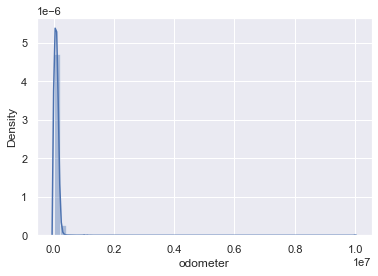

In [9]:
sns.distplot(CarsDf.odometer)

<AxesSubplot:xlabel='price'>

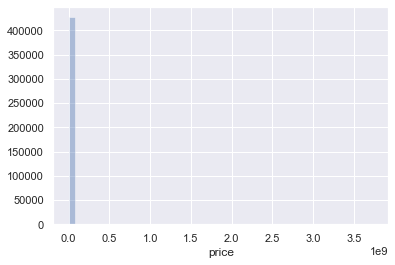

In [10]:
sns.distplot(CarsDf.price, kde=False)

In [11]:
CarsDf.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


<AxesSubplot:xlabel='odometer', ylabel='price'>

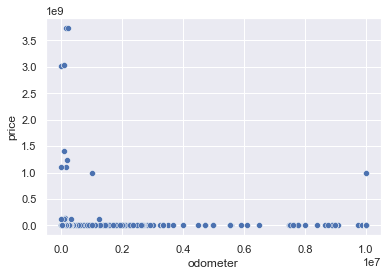

In [12]:
sns.scatterplot(x=CarsDf.odometer,y=CarsDf.price)

In [13]:
CarsDf.nunique()

price            15655
year               114
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
transmission         3
drive                3
type                13
paint_color         12
state               51
dtype: int64

In [14]:
CarsDf.tail()

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
426875,23590,2019.0,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,NaN,wy
426876,30590,2020.0,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,other,fwd,sedan,red,wy
426877,34990,2020.0,xt4 sport suv 4d,good,NaN,diesel,4174.0,other,NaN,hatchback,white,wy
426878,28990,2018.0,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,silver,wy
426879,30590,2019.0,4 series 430i gran coupe,good,NaN,gas,22716.0,other,rwd,coupe,NaN,wy


In [15]:
CarsDf.year = CarsDf.year.astype('object')
CarsDf.year.dtype

dtype('O')

Filling missing value of odometer with median as it is not affected by outlier.

In [16]:
CarsDf.fillna(CarsDf.median(numeric_only=True), inplace=True)

In [17]:
CarsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  object 
 2   model         421603 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      426880 non-null  float64
 7   transmission  424324 non-null  object 
 8   drive         296313 non-null  object 
 9   type          334022 non-null  object 
 10  paint_color   296677 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 39.1+ MB


Filling all categorical columns with mode value of that column

In [18]:
CarsDf = CarsDf.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [19]:
CarsDf.year = CarsDf.year.astype('int')
CarsDf.odometer = CarsDf.odometer.astype('int')

In [20]:
CarsDf.head()

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,6000,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,az
1,11900,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,ar
2,21000,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,fl
3,1500,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,ma
4,4900,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,nc


In [21]:
CarsDf.nunique()

price            15655
year               114
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
transmission         3
drive                3
type                13
paint_color         12
state               51
dtype: int64

In [22]:
CarsDf.model.value_counts()

f-150                       13286
silverado 1500               5140
1500                         4211
camry                        3135
silverado                    3023
                            ...  
Huyndai Sante Fe Limited        1
astro awd 4x4                   1
escalade and                    1
cx 3                            1
Paige Glenbrook Touring         1
Name: model, Length: 29667, dtype: int64

## FEATURE ENGINEERING

###### 2.1 Creation of Hyphoteses
2.1.1 Condition Hyphoteses

1. Used cars with silver or black painting should be expensive.

2. Used cars which has interior with good condition should be expensive.

3. Used cars with high Mailage should be cheaper.

4. Used cars with better Appearance should be expensive.

5. Used cars wich has a good Mechanical should be expensive.

6. Used cars with any Insurance should be cheaper.
2.1.2 Location Hyphoteses

1. Used cars located in periphery neighborhood should be cheaper.

2. Used cars in west or northeast regions should cost more.

3. Used cars located in rich cities should be expensive.

4. Used cars in rich States should cost more.

5. Used cars that are in urban environments should be expensive.

6. Used cars that are in rural environments should cost less.

7. Used cars that come from another country should cost more.
2.1.3 Category Hyphoteses

1. Used cars with less size should be cheaper.

2. Used cars which come from big manufacturer should be cost more.

3. Used cars with 4wd drive should be cost more.

4. Used cars belongs to luxury segment should cost more.

5. Used cars with electric fuel should be expensive.

6. Used cars with SUV, pickup or truck type should cost more.
2.1.4 Acessories Hyphoteses

1. Used cars with automatic transmission should be cost more.

2. Used cars with silver or black paint-color should be expensive.

3. Used cars with high-end stereos should be expensive.

4. Used cars with less Airbags should be cheaper.

5. Used cars with air-condition should cost more.

6. Used cars with automatic pilot should cost more.

7. Used cars with supercharger kits should cost more.

8. Used cars with custom rims should cost more.

9. Used cars with more cylinders should be expensive.
2.1.5 Time Hyphoteses

1. Used cars with Lat/Long loacated in cost areas should cost more.

2. Used cars which has lifetime longer should be cheaper.

3. Used cars with less age should cost less.

4. Used cars selling in summer or winter season should be expensive.

5. Used cars selling in holidays should be expensive.
2.1.6 Sales Channel Hyphoteses

1. Used cars selling in physical store.

2. Used cars selling in online store should be cheaper.

3. Used cars selling through an owner should be cheaper.

4. Used cars selling through a middleman should be expensive.
2.2 Final List of Hyphoteses

Based on some criteria, such as: information already available in the dataset and data that would be available at the beginning of the collection process.
I created a final list of hypotheses that, in a possible second cycle, can increase when I include another item from the previously made list.

1. Used cars with high Mailage should be cheaper.

2. Used cars with better Appearance should be expensive.

3. Used cars in west or northeast regions should cost more.

4. Used cars in rich States should cost more.

5. Used cars which come from big manufacturer should be cost more.

6. Used cars with 4wd drive should be cost more.

7. Used cars with electric fuel should be expensive.

8. Used cars with SUV, pickup or truck type should cost more.

9. Used cars with automatic transmission should be cost more.

10. Used cars with silver or black paint-color should be expensive.

11. Used cars with more cylinders should be expensive.

12. Used cars with Lat/Long loacated in cost areas should cost more.

13. Used cars with less age should cost less.


In [23]:
CarsDf = CarsDf[(CarsDf['price']!=0) | (CarsDf['odometer']!=0.0)]

Removing Outliers

In [24]:
# As we can see above in distplots, the dataset has a lot of outliers.
# Now, I will drop the outliers using the formula below:
# Q1 - 1.5*IQR to inferior limit
# Q3 + 1.5*IQR to superior limit

Q1 = np.quantile(CarsDf['price'],0.25)
Q3 = np.quantile(CarsDf['price'],0.75)
IQR = Q3 - Q1

inferior_limit = Q1 - 1.5*IQR
superior_limit = Q3 + 1.5*IQR

CarsDf = CarsDf[(CarsDf['price']>inferior_limit) & (CarsDf['price']<superior_limit)]
CarsDf = CarsDf[(CarsDf['price']!=0) | (CarsDf['odometer']!=0)]

<AxesSubplot:xlabel='price'>

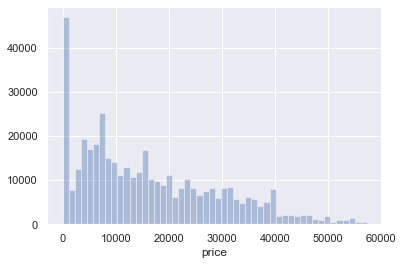

In [25]:
sns.distplot(CarsDf.price, kde=False)

In [26]:
CarsDf.columns[1:]

Index(['year', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [27]:
CarsDf.head()

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,6000,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,az
1,11900,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,ar
2,21000,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,fl
3,1500,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,ma
4,4900,2017,f-150,good,6 cylinders,gas,85548,automatic,4wd,sedan,white,nc


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
l = LabelEncoder()

In [30]:
CarsDf = CarsDf.apply(l.fit_transform)

In [31]:
CarsDf.corr()

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
price,1.000000,0.313450,0.030646,0.123550,0.222532,0.022129,-0.478372,0.350430,-0.055850,-0.012733,-0.034500,-0.000071
year,0.313450,1.000000,0.056364,0.088339,-0.085676,0.108410,-0.318745,0.134975,-0.118787,-0.033839,-0.010725,0.009895
model,0.030646,0.056364,1.000000,-0.003478,0.042872,0.075317,0.000546,0.014020,-0.094817,-0.106425,-0.002625,0.003269
condition,0.123550,0.088339,-0.003478,1.000000,0.085878,0.078771,-0.147967,0.162346,-0.047806,0.064126,0.026017,0.037943
cylinders,0.222532,-0.085676,0.042872,0.085878,1.000000,-0.030950,-0.006519,0.102328,-0.070320,0.059458,0.049343,0.026361
fuel,0.022129,0.108410,0.075317,0.078771,-0.030950,1.000000,-0.210385,0.270284,0.018880,-0.097030,-0.064609,-0.027140
odometer,-0.478372,-0.318745,0.000546,-0.147967,-0.006519,-0.210385,1.000000,-0.396197,-0.058088,0.043354,0.030589,0.011886
transmission,0.350430,0.134975,0.014020,0.162346,0.102328,0.270284,-0.396197,1.000000,0.043045,-0.024494,-0.052859,-0.008354
drive,-0.055850,-0.118787,-0.094817,-0.047806,-0.070320,0.018880,-0.058088,0.043045,1.000000,0.023797,-0.079137,-0.044530
type,-0.012733,-0.033839,-0.106425,0.064126,0.059458,-0.097030,0.043354,-0.024494,0.023797,1.000000,0.125453,-0.004665


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
m = MinMaxScaler()
CarsDf = pd.DataFrame(m.fit_transform(CarsDf),columns=['price', 'year', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state'])

In [34]:
CarsDf.head()

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,0.128235,0.955357,0.480325,0.4,0.714286,0.5,0.449376,0.0,0.0,0.75,0.909091,0.06
1,0.274810,0.955357,0.480325,0.4,0.714286,0.5,0.449376,0.0,0.0,0.75,0.909091,0.04
2,0.539723,0.955357,0.480325,0.4,0.714286,0.5,0.449376,0.0,0.0,0.75,0.909091,0.18
3,0.062491,0.955357,0.480325,0.4,0.714286,0.5,0.449376,0.0,0.0,0.75,0.909091,0.38
4,0.105190,0.955357,0.480325,0.4,0.714286,0.5,0.449376,0.0,0.0,0.75,0.909091,0.54


In [35]:
CarsDf.corr()

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
price,1.000000,0.313450,0.030646,0.123550,0.222532,0.022129,-0.478372,0.350430,-0.055850,-0.012733,-0.034500,-0.000071
year,0.313450,1.000000,0.056364,0.088339,-0.085676,0.108410,-0.318745,0.134975,-0.118787,-0.033839,-0.010725,0.009895
model,0.030646,0.056364,1.000000,-0.003478,0.042872,0.075317,0.000546,0.014020,-0.094817,-0.106425,-0.002625,0.003269
condition,0.123550,0.088339,-0.003478,1.000000,0.085878,0.078771,-0.147967,0.162346,-0.047806,0.064126,0.026017,0.037943
cylinders,0.222532,-0.085676,0.042872,0.085878,1.000000,-0.030950,-0.006519,0.102328,-0.070320,0.059458,0.049343,0.026361
fuel,0.022129,0.108410,0.075317,0.078771,-0.030950,1.000000,-0.210385,0.270284,0.018880,-0.097030,-0.064609,-0.027140
odometer,-0.478372,-0.318745,0.000546,-0.147967,-0.006519,-0.210385,1.000000,-0.396197,-0.058088,0.043354,0.030589,0.011886
transmission,0.350430,0.134975,0.014020,0.162346,0.102328,0.270284,-0.396197,1.000000,0.043045,-0.024494,-0.052859,-0.008354
drive,-0.055850,-0.118787,-0.094817,-0.047806,-0.070320,0.018880,-0.058088,0.043045,1.000000,0.023797,-0.079137,-0.044530
type,-0.012733,-0.033839,-0.106425,0.064126,0.059458,-0.097030,0.043354,-0.024494,0.023797,1.000000,0.125453,-0.004665


In [36]:
CarsDf_y = CarsDf['price']
CarsDf_x = CarsDf.drop(columns='price')

In [37]:
from sklearn.model_selection import train_test_split
# Create training and testing vars
training_set, test_set, class_set, test_class_set = train_test_split(CarsDf_x, CarsDf_y, test_size=0.2)


In [38]:
class_set = class_set.values.ravel()
test_class_set = test_class_set.values.ravel()

## Using Random forest regressor to find feature importance

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
fit_rf = RandomForestRegressor(random_state=40)

### Hyper_Parameter Optimization Using GridSearchCV

In [41]:
# import time
# np.random.seed(40)
# start = time.time()

# param_dist = {'max_depth':[2,3,4,5],
#              'bootstrap':[True,False],
#              'max_features':['auto','sqrt','log2',None],
#              'criterion':["squared_error", "absolute_error", "poisson"]}

# cv_rf = GridSearchCV(fit_rf,cv=10,param_grid=param_dist,n_jobs=3)

# cv_rf.fit(training_set,class_set)
# print('Best Parameters using Grid search: \n',cv_rf.best_params_)
# end = time.time()
# print('Time taken in grid search: %0.2f'%(end-start))

In [42]:
fit_rf.set_params(criterion='squared_error',max_features = 'log2',max_depth = 5)

RandomForestRegressor(max_depth=5, max_features='log2', random_state=40)

In [43]:
## OOB Rate

In [44]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [47]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

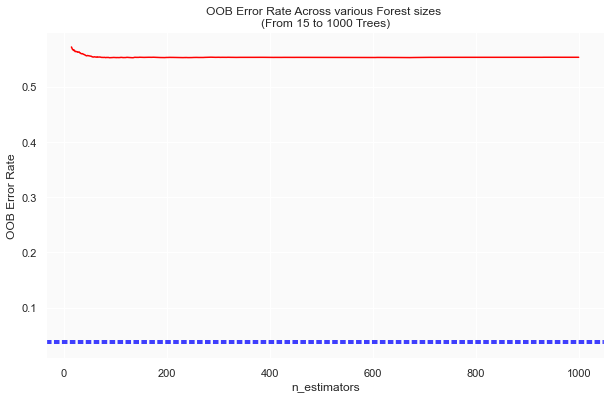

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

In [49]:
fit_rf.set_params(n_estimators=600,bootstrap=True,warm_start=False,oob_score=False)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=600,
                      random_state=40)

In [50]:
## Train The Random Forest

In [51]:
fit_rf.fit(training_set,class_set)

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=600,
                      random_state=40)

In [52]:
## Variable Importance

In [53]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' [is not an instantiated model from scikit-learn]".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [54]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']
print(indices_rf.shape)

(11,)


In [55]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [63]:
names_index=CarsDf_x.columns
print(names_index)

Index(['year', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')


In [64]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'year' has a Mean Decrease in Impurity of 0.36919
2. The feature 'odometer' has a Mean Decrease in Impurity of 0.26938
3. The feature 'transmission' has a Mean Decrease in Impurity of 0.13370
4. The feature 'cylinders' has a Mean Decrease in Impurity of 0.07277
5. The feature 'fuel' has a Mean Decrease in Impurity of 0.06657
6. The feature 'type' has a Mean Decrease in Impurity of 0.04106
7. The feature 'drive' has a Mean Decrease in Impurity of 0.02643
8. The feature 'condition' has a Mean Decrease in Impurity of 0.00982
9. The feature 'model' has a Mean Decrease in Impurity of 0.00885
10. The feature 'paint_color' has a Mean Decrease in Impurity of 0.00124
11. The feature 'state' has a Mean Decrease in Impurity of 0.00100


In [65]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

#     ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

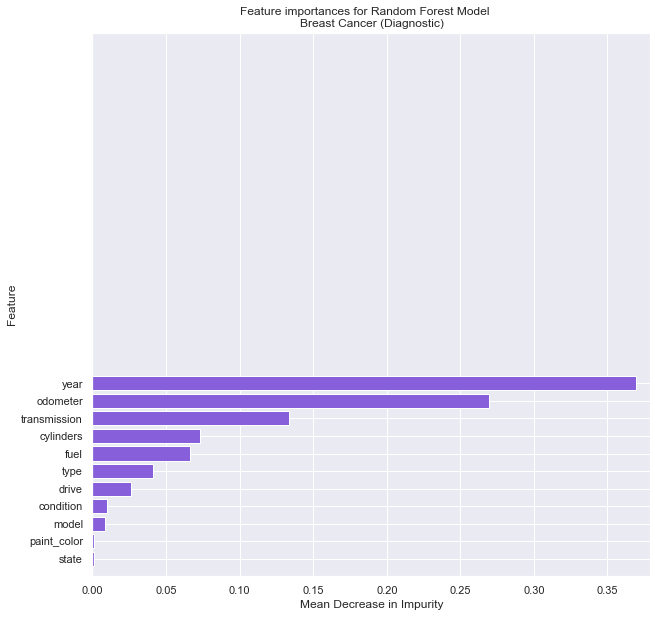

In [66]:
variable_importance_plot(importances_rf, indices_rf, names_index)